In [1]:
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import pymc3 as pm

In [2]:
figsize(12.5, 3.5)
count_data = np.loadtxt("example_data/count_data.csv")
n_count_data = len(count_data)

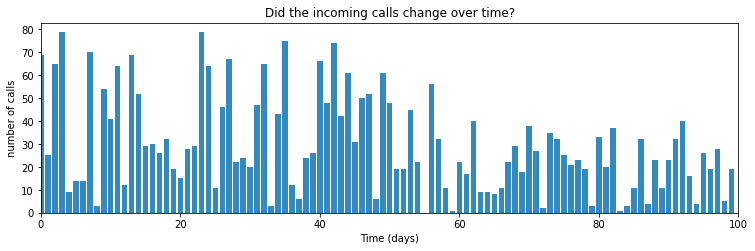

In [3]:
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("number of calls")
plt.title("Did the incoming calls change over time?")
plt.xlim(0, n_count_data);


In [4]:
alpha = 1.0/count_data.mean()
days = np.arange(0, n_count_data)
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)
    rate = pm.math.switch(tau >= days, lambda_1, lambda_2)
    # Likelihood (sampling distribution) of observations
    observation = pm.Poisson("observation", rate, observed=count_data)

In [5]:
with basic_model:
    trace = pm.sample(10000, return_inferencedata=False)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [lambda_2, lambda_1]
>Metropolis: [tau]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 21 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


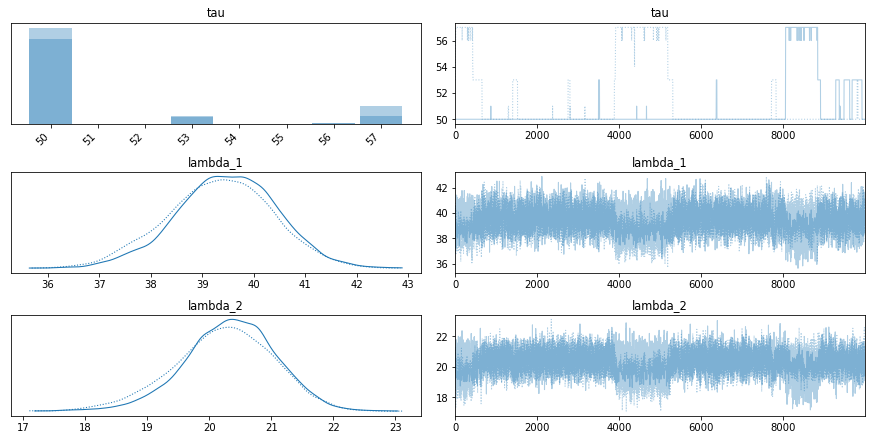

In [6]:
with basic_model:
    axes_arr = az.plot_trace(trace)
plt.draw()
for ax in axes_arr.flatten():
    if ax.get_title() == "tau":
        labels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels, rotation=45, ha="right")
        break
plt.draw()